# Task 1: XOR

In [ ]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
% matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where __ _wi, wh, b, a, c_ __ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input (x0, x1) = (1, 0), ground truth (g1, g2) = (1, 1), h0 = 0, (wi, wh, b, a, c) = (1, 1, 1, 1, 1), compute __ _(dwi, dwh, db, da, dc)_ __, which are the gradients of loss with repect to 5 parameters __ _(wi, wh, b, a, c)_ __.

![bptt](./img/bptt.png)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process]**
* You can use LATEX to edit the equations, and Jupyter notebook can recognize basic LATEX syntax. Alternatively, you can edit equations in some other environment and then paste the screenshot of the equations here.

![task1_1](./img/task1_1.png)

![task1_2](./img/task1_2.png)

![task1_3](./img/task1_3.png)

## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the LSTM. Please read the source code for more information.

In [1]:
from ecbm4040.xor.utils import create_dataset

### Build a network using a Tensorlow LSTMCell
This section shows an example how to build a RNN network using an LSTM cell. LSTM cell is an inbuilt class in tensorflow which implements the real behavior of the LSTM neuron. 

Reference: [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/contrib/rnn/LSTMCell)

In [2]:
from tensorflow.contrib.rnn import LSTMCell
import tensorflow as tf

tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training funciton for RNN; 
2. Plot the cost during the traning

In [3]:
# YOUR TRAINING AND PLOTTING CODE HERE
X_train, y_train = create_dataset(num_samples=3000, seq_len=8)

epoch = 20
train_loss = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epc in range(epoch):
        print("epoch {} ".format(epc + 1))
        _, cur_loss = sess.run([optimizer, loss], feed_dict={input_data: X_train, output_data: y_train})
        train_loss.append(cur_loss)
        print('loss: {}'.format(cur_loss))
        

epoch 1 
loss: 0.692884087562561
epoch 2 
loss: 0.6911857724189758
epoch 3 
loss: 0.68988037109375
epoch 4 
loss: 0.6888569593429565
epoch 5 
loss: 0.688031792640686
epoch 6 
loss: 0.6873340010643005
epoch 7 
loss: 0.6867247819900513
epoch 8 
loss: 0.6861674785614014
epoch 9 
loss: 0.6856187582015991
epoch 10 
loss: 0.685067892074585
epoch 11 
loss: 0.6845066547393799
epoch 12 
loss: 0.6839565634727478
epoch 13 
loss: 0.6834163665771484
epoch 14 
loss: 0.6828851103782654
epoch 15 
loss: 0.6823425889015198
epoch 16 
loss: 0.6817556023597717
epoch 17 
loss: 0.6810413002967834
epoch 18 
loss: 0.6801648139953613
epoch 19 
loss: 0.6790605783462524
epoch 20 
loss: 0.6777708530426025


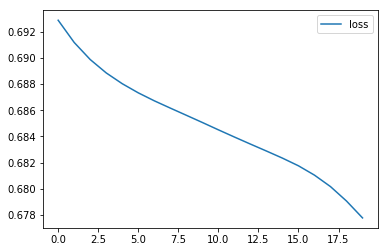

In [4]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label="loss")
plt.legend()
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in ecbm4040/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [2]:
from ecbm4040.xor.rnn import MyLSTMCell
import tensorflow as tf

# recreate xor netowrk with your own LSTM cell
tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
out,_ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [3]:
# YOUR TRAINING AND PLOTTING CODE HERE
X_train, y_train = create_dataset(num_samples=3000, seq_len=8)

epoch = 20
train_loss = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epc in range(epoch):
        print("epoch {} ".format(epc + 1))
        _, cur_loss = sess.run([optimizer, loss], feed_dict={input_data: X_train, output_data: y_train})
        train_loss.append(cur_loss)
        print('loss: {}'.format(cur_loss))
        

epoch 1 
loss: 0.7809576988220215
epoch 2 
loss: 0.702579915523529
epoch 3 
loss: 0.6883257031440735
epoch 4 
loss: 0.7111992239952087
epoch 5 
loss: 0.7100645899772644
epoch 6 
loss: 0.7051515579223633
epoch 7 
loss: 0.7049220204353333
epoch 8 
loss: 0.703635573387146
epoch 9 
loss: 0.7010678648948669
epoch 10 
loss: 0.697865903377533
epoch 11 
loss: 0.6905665397644043
epoch 12 
loss: 0.6824833154678345
epoch 13 
loss: 0.6593925952911377
epoch 14 
loss: 0.6521002054214478
epoch 15 
loss: 0.6490604877471924
epoch 16 
loss: 0.6439380645751953
epoch 17 
loss: 0.6377037763595581
epoch 18 
loss: 0.6425344347953796
epoch 19 
loss: 0.6486814618110657
epoch 20 
loss: 0.6482439041137695


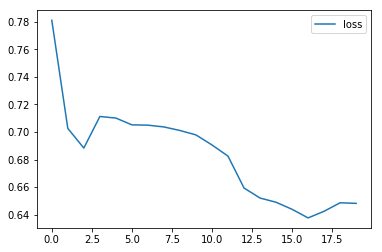

In [4]:
import matplotlib.pyplot as plt

plt.plot(train_loss, label="loss")
plt.legend()
plt.show()